In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# One-Sample T-Test

Preparing the Data

In [88]:
np.random.seed(40)

population_data_1 = np.random.normal(50 , 10, 50000)

# Generating a considerable sample dataset

sample_data_1 = np.random.normal(49 , 10, 500)

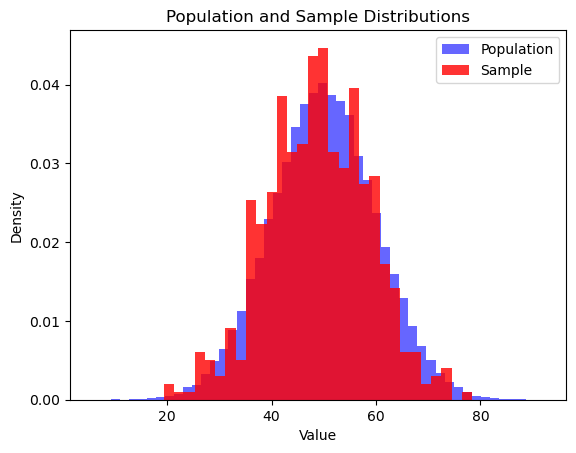

In [89]:
plt.hist(population_data_1, bins=50, density=True, alpha=0.6, color='blue', label='Population')
plt.hist(sample_data_1, bins=30, density=True, alpha=0.8, color='red', label='Sample')
plt.title('Population and Sample Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

The population and sample means

In [90]:
print(population_data_1.mean(),sample_data_1.mean())

50.016453111951634 48.86620038023108


## Hypothesis Testing

In [110]:
t_statistic_1 , p_value_1 = stats.ttest_1samp( a = sample_data_1 , popmean = population_data_1.mean() )

In [111]:
print(f"T-test is :{t_statistic_1}")

T-test is :-2.6271306709390263


In this hypothesis testing, we are examining whether the sample mean differs from the population mean. The alternative hypothesis, which we aim to support, asserts this difference, while the null hypothesis posits that both the sample mean and population mean are equal.

The T-test measures how much the sample evidence (sample mean) deviates from the null hypothesis. If the evidence falls into the rejection region of the null hypothesis, we reject the null hypothesis.

In [101]:
# Left quantile

stats.t.ppf( 0.05/2 , df=(len(sample_data_1)-1) )

-1.9647293909876653

In [103]:
# Right quantile

stats.t.ppf( (1 - 0.05/2) , df=(len(sample_data_1)-1) )

1.9647293909876649

In a two-tailed hypothesis test, significance is assessed in both tails of the t-distribution. For a significance level of 0.05, the critical t-values marking the boundaries of the rejection regions are typically symmetrically located around the mean. For instance, at alpha = 0.05, the critical values might be approximately -1.964 and +1.964, encompassing the rejection regions beyond these t-values in both tails of the distribution.

The test statistic falls within the rejection region, leading us to reject the null hypothesis at a 5% significance level.

In [112]:
print(f"The P_value of the T-test is :{p_value_1}")

The P_value of the T-test is :0.008875726427582012


The P-Value Approache:
Since 0.008 is inferiour than 0.05, We reject the null hypothesis !

# Two-Sample T-Test

Prepare data

In [206]:
sample_data_2 = np.random.normal( 49 , 11 , 100 )

## Hypothesis Testing

In [207]:
t_statistic_2 , p_value_2 = stats.ttest_ind(a= sample_data_1 , b=sample_data_2, equal_var=False)

In [210]:
print(f"{t_statistic_2} , {p_value_2:.40f}")

0.7637324784073689 , 0.4463374585082601209151675902830902487040


As 0.44 is greater than 0.05, there isn't sufficient evidence to reject the null hypothesis, indicating no significant difference between the means of the two samples.

# Paired T-Test

Prepare data

In [4]:
before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

In [5]:
stats.ttest_rel(a = before, b = after)

TtestResult(statistic=3.144082571163074, pvalue=0.0021993911368008816, df=99)

We opted for the Paired T-test as we're investigating the impact of a weight loss treatment within the same group. With a p-value of 0.002, which is less than 0.05, it suggests a notable change has occurred!